# ELM368 ÖDEV#5
## Adı Soyadı : Mahmut Safa BULAT
## Öğrenci No: 141024051

### Kütüphaneleri ekleme

In [3]:
import numpy as np                      
#mat. fonksiyonlarını kullanabilmek için gereken kütüphane.
import cmath as c                       
#complex sayılar için başka bir mat. kütüphanesi.
from matplotlib import pyplot as plt    
#plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane.
from scipy import signal
#spicy kütüphanesini ekliyoruz
%matplotlib notebook
#düzgün grafik görüntülemek için gerekiyor.

from numpy import pi as pi 
from numpy import sin as sin 
from numpy import cos as cos 
#pi sayısı, sin ve cos'u direkt pi, sin, cos olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
#complex sayı hatalarını almamak için. ***
#*** bu işlem sonuçları etkilememektedir.

## SORU 1)

#### 𝑥1(𝑡)=7cos⁡(200𝜋𝑡) ve 𝑥2(𝑡)=3cos(200𝜋𝑡)+4cos⁡(1800𝜋𝑡) işaretlerini sırasıyla 𝐹𝑠=2200⁡𝐻𝑧 ile örnekleyiniz.

<IPython.core.display.Javascript object>


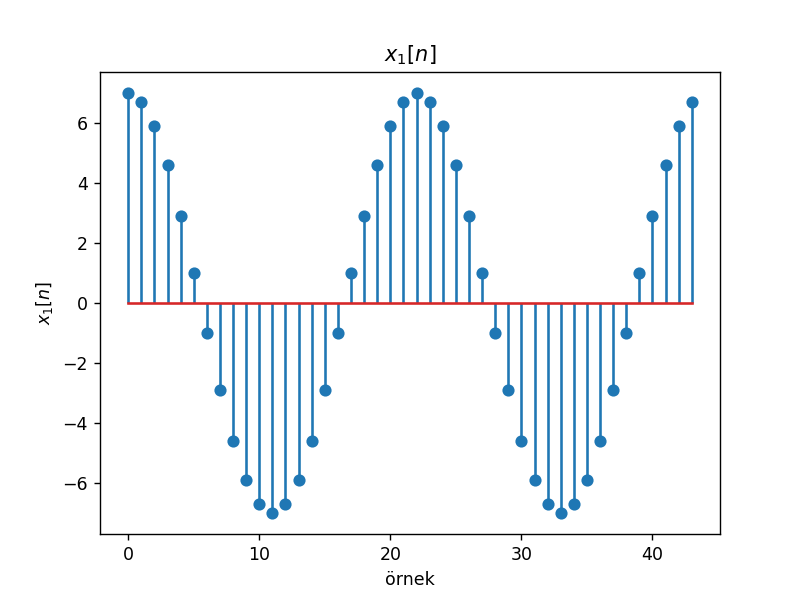

<IPython.core.display.Javascript object>


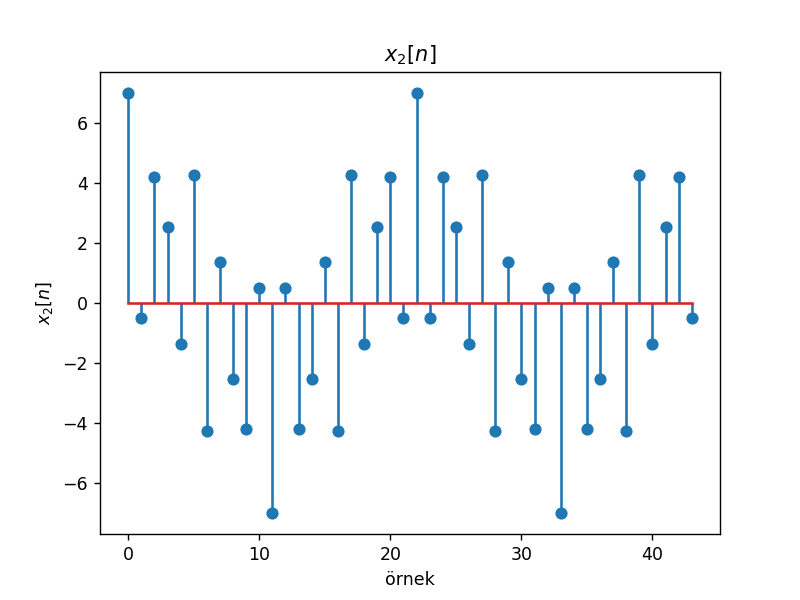

In [5]:
#𝑥_1(𝑡)=7cos⁡(200𝜋𝑡);

# 2200 > 2 * 100 olur ve nyquist şartını sağlar.
Fs_1=2200 # örnekleme frekansının tanımlanması
Ts_1=1/Fs_1 # örnekleme periyodunun tanımlanması 

# N'i bulmak için hesap yaparsak k=1 için N=22 olur. 
N_1_1=22 # örnek sayısının tanımlanması (x_1 için)
n_1_1=np.arange(0.,2*N_1_1) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
x_1_1=7*cos(200*pi*n_1_1*Ts_1) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(101); #çizimler için yeni figür açılması
plt.stem(n_1_1,x_1_1) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("$x_1[n]$") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_1[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiğin gösterilmesi

#𝑥_2(𝑡)=3cos(200𝜋𝑡)+4cos⁡(1800𝜋𝑡);

'''
sinyale bakıldığında w toplamları 2𝜋k olur;
#aslında aynı sinyallerdir x_2(t) sinyanlimiz de;
#zaman uzayında x_2(t)= 7cos⁡(200𝜋𝑡) olarak yazılabilir.
'''
# burada F_n, frekans değeri yüksek olan 4cos(1800𝜋𝑡) tarafından belirlenir.
# 2200 > 2 * 900 olur ve nyquist şartını sağlar.
#Fs=2200 örnekleme frekansı yukarıda tanımlı
#Ts=1/Fs # örnekleme periyodu yukarıda tanımlı

# N'i bulmak için hesap yaparsak k=9 için N=22 olur. 
N_1_2=22 # örnek sayısının tanımlanması (x_2 için)
n_1_2=np.arange(0.,2*N_1_2) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
x_1_2=3*cos(200*pi*n_1_2*Ts_1) + 4*cos(1800*pi*n_1_2*Ts_1) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(102); #çizimler için yeni figür açılması
plt.stem(n_1_2,x_1_2) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("$x_2[n]$") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_2[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiğin gösterilmesi

#### 1. 𝑎) Örnekleme sonucunda elde ettiğiniz 𝑥1[𝑛] ve 𝑥2[𝑛] sinyallerinin grafiklerini iki periyot için çizdirerek karşılaştırınız. İki işaret arasında her hangi bir fark var mı? Neden?

#### 1. 𝑏) 𝑥1[𝑛] ve 𝑥2[𝑛] sinyallerinin Fourier transformlarını elde ederek işaretleri frekans domaininde inceleyiniz. Elde ettiğiniz 𝑋1(𝜔) ve 𝑋2(𝜔) grafiklerini beklediğiniz gibi mi? Grafikleri karşılaştırarak grafikler arasında fark olup olmadığını açıklayarak ve nedenini irdeleyiniz.

<IPython.core.display.Javascript object>


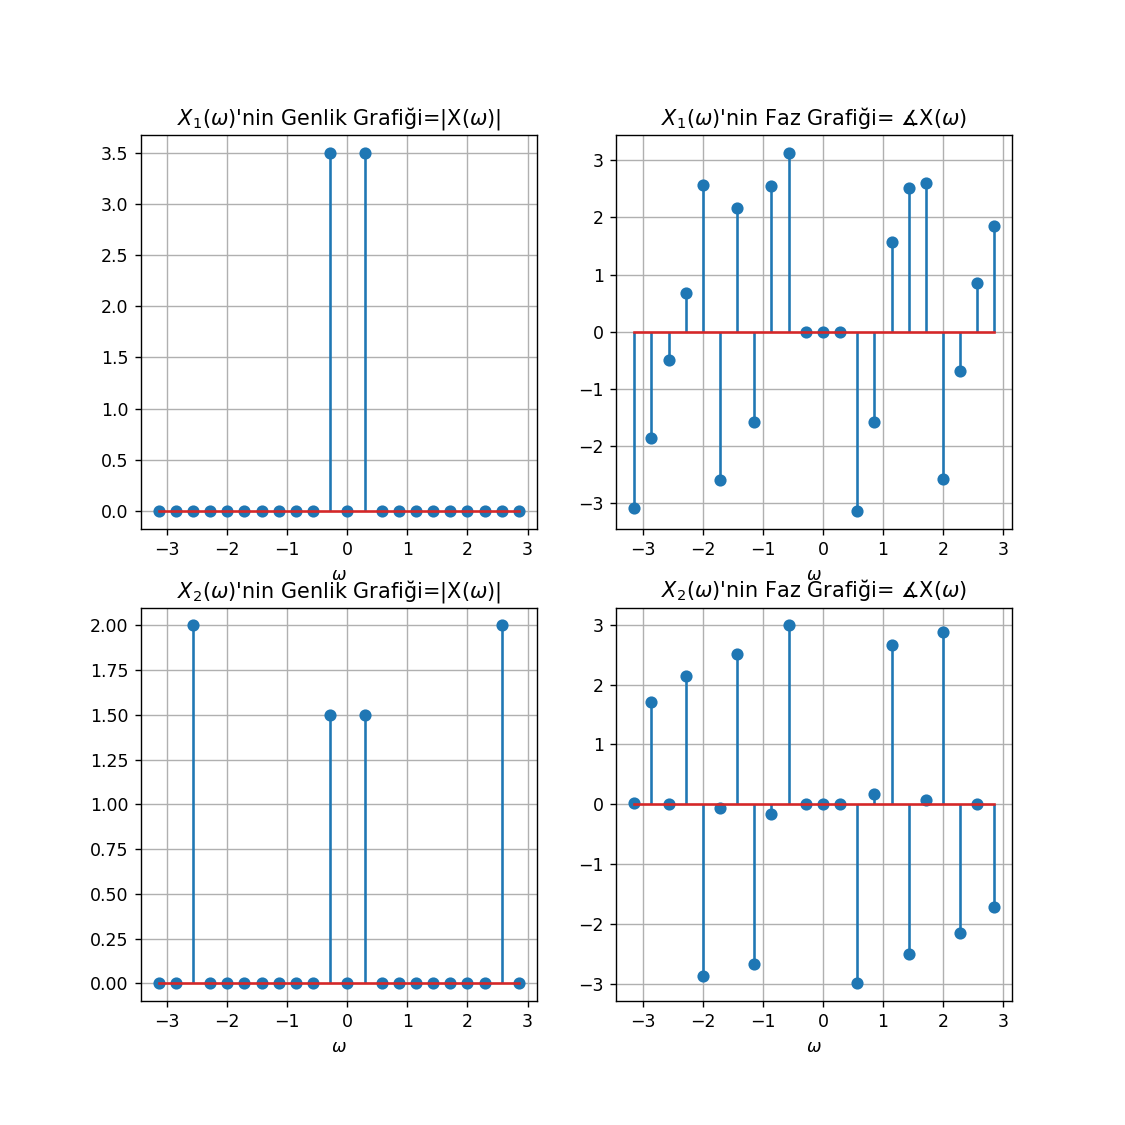

In [6]:
#işaretimizin fourier dönüşümünü alalım
#iki sinyalimiz için de N=22 bulmuştuk.

N=22 

w=np.linspace(-pi,pi-(2*pi/N),N) #aralıkların belirlenmesi

xw_1_1=np.fft.fft(x_1_1,N)/N  #fourier dönüşümünün alınması
xw_1_1=np.fft.fftshift(xw_1_1) #ffshift ile X(w) nin -pi ve pi aralığında gösterilmesi

xw_1_2=np.fft.fft(x_1_2,N)/N  #fourier dönüşümünün alınması
xw_1_2=np.fft.fftshift(xw_1_2) #ffshift ile X(w) nin -pi ve pi aralığında gösterilmesi

plt.figure(figsize=[9,9])  #grafiklerin boyutunun ayarlanması
plt.subplot(221)
plt.stem(w,np.abs(xw_1_1),use_line_collection=True)  #abs() komutu ile genliğinin bulunması ve çizdirilmesi
plt.title("$X_1$($\omega$)'nin Genlik Grafiği=|X($\omega$)|")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(222)
plt.stem(w,np.angle(xw_1_1),use_line_collection=True) #angle() komutu ile fazının bulunması e çizdirilmesi
plt.title("$X_1$($\omega$)'nin Faz Grafiği= $ \measuredangle$X($\omega$)")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(223)
plt.stem(w,np.abs(xw_1_2),use_line_collection=True)  #abs() komutu ile genliğinin bulunması ve çizdirilmesi
plt.title("$X_2$($\omega$)'nin Genlik Grafiği=|X($\omega$)|")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(224)
plt.stem(w,np.angle(xw_1_2),use_line_collection=True) #angle() komutu ile fazının bulunması e çizdirilmesi
plt.title("$X_2$($\omega$)'nin Faz Grafiği= $ \measuredangle$X($\omega$)")
plt.xlabel("$\omega$")
plt.grid()

plt.show()

Yorum:

Elde ettiğimiz x1[n] ve x2[n] işaretlerimizin fourier dönüşümünü alarak frekans domainine geçtik. Fourier dönüşümünü aldığımızda hem gerçel(genlik) hem de imajiner(faz) kısımlar olacağı için grafiklerimizi çizdirirken bu durumu göz önünde bulundurarak genlik ve faz değerlerini ayrı ayrı çizdirdik. Görüldüğü üzere bu iki işaretin birbirlerinden farklı olduğunu genlik kısımlarından söyleye biliriz.

x1[n] = 7cos(𝜋n/11) ve x2[n] = 3cos(𝜋n/11)+4cos(9𝜋n/11) olduğunu bulmuştuk. Bu iki işaretin fourier dönüşümlerini aldığımızda bant genişliklerinin sırasıyla 𝜋/11 ve 9𝜋/11 olmasını bekleriz.

Genlikler üzerinden görüldüğü üzere X1(w) sinyalimizin bant genişliği 2.80 o da yaklaşık olarak 𝜋/11 e denk gelmektedir.
 X2(W) işaretimizin bant genişliği ise en dıştaki örnekten bakacağımız için 2.56 o da yaklaşık olarak 9𝜋/11 e denk gelmektedir.  (faremizi örneğimizin x-ekseni üzerinde başladığı noktaya getirerek yaklaşık değerler okunmuştur)
Elde ettiğimiz dönüşüm grafikleri beklediğimiz gibidir. Fs=2200hz aldığımızdan dolayı iki işaretimizin örneklenmiş halinde örtüşme olmamaktadır (nyquiest kuralına göre).

#### 1. c) Elde ettiğiniz 𝑋1(𝜔) ve 𝑋2(𝜔)’nın genlik ve faz grafiklerinden 𝑥1[𝑛] ve 𝑥2[𝑛] işaretlerinin ne olduğunu tahmin ediniz. Bu ayrık zamanlı işaretler beklediğiniz gibi mi? Neden?

Genlik ve faz grafiklerine bakarak bu işaretlerin kosinus işaretler olduğunu; birinci işaret tek bir 2* 3.5 genlikli tek bir kosinusten oluşurken ikinci işaretin 2*2 ve 2*1.5 genlikli iki ayrı kosinüsten oluştuğunu genlik grafiğinden açıkça görebiliyoruz.

Faz grafiğini inceleyerek w değerlerini gözlemleyerek x_1[n] ve x_2[n] işaretlerini tamamen çıkartabiliriz.

Bu ayrık zamanlı işaretler beklediğimiz gibi gelmiştir. Sürekli zamandan ayrık zamana geçerken genlik anlamında kosinüs euler açılımından kaynaklanan bir /2 durumu oluşması normaldir. Teorik açıdan inceleyip sinyalleri el ile açsaydık da bulacağımız grafikler (belki faz grafiğini bu kadar detaylı çizemezdik) aşağı yukarı böyle olacaktı. 

## SORU 2)

#### Bir önceki soruyu 𝐹𝑠=1000⁡𝐻𝑧 için tekrarlayınız.

<IPython.core.display.Javascript object>


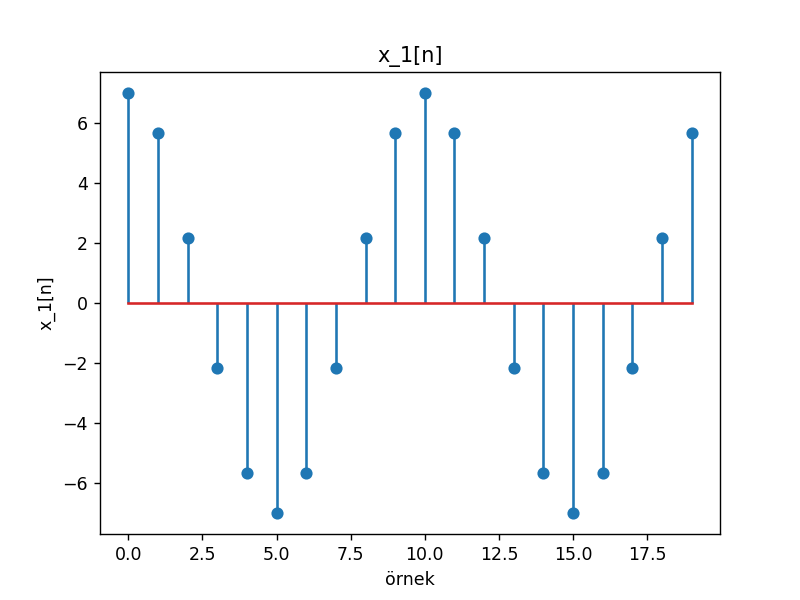

<IPython.core.display.Javascript object>


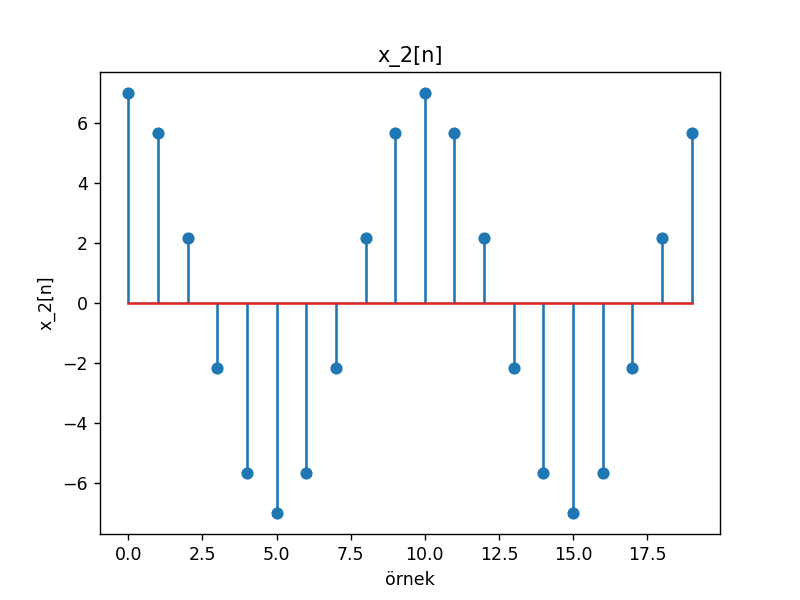

In [7]:
#𝑥_1(𝑡)=7cos⁡(200𝜋𝑡);

# 1000 > 2 * 100 olur ve nyquist şartını sağlar.
Fs_2=1000 # örnekleme frekansının tanımlanması
Ts_2=1/Fs_2 # örnekleme periyodunun tanımlanması 

# N'i bulmak için hesap yaparsak k=1 için N=10 olur. 
N_2_1=10 # örnek sayısının tanımlanması (x_1 için)
n_2_1=np.arange(0.,2*N_2_1) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
x_2_1=7*cos(200*pi*n_2_1*Ts_2) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(201); #çizimler için yeni figür açılması
plt.stem(n_2_1,x_2_1) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("x_1[n]") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("x_1[n]") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiğin gösterilmesi

#𝑥_2(𝑡)=3cos(200𝜋𝑡)+4cos⁡(1800𝜋𝑡);
'''
1000 > 2 * 900 olur ve nyquist şartını sağlanmaz, bu yüzden örtüşme olacaktır.
Örtüşme olmaması için Fs en az Fs = 1800 Hz seçilmeliydi.
'''
#Fs=1000 örnekleme frekansı yukarıda tanımlı
#Ts=1/Fs # örnekleme periyodu yukarıda tanımlı

# N'i bulmak için hesap yaparsak k=9 için N=10 olur. 
N_2_2=10 # örnek sayısının tanımlanması (x_2 için)
n_2_2=np.arange(0.,2*N_2_2) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
x_2_2=3*cos(200*pi*n_2_2*Ts_2) + 4*cos(1800*pi*n_2_2*Ts_2) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(202); #çizimler için yeni figür açılması
plt.stem(n_2_2,x_2_2) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("x_2[n]") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("x_2[n]") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiğin gösterilmesi

#### 2. 𝑎) Örnekleme sonucunda elde ettiğiniz 𝑥1[𝑛] ve 𝑥2[𝑛] sinyallerinin grafiklerini iki periyot için çizdirerek karşılaştırınız. İki işaret arasında her hangi bir fark var mı? Neden?

x_1[n] ve x_2[n] sinyallerimize bakacak olursak; 

x_1[n] = 7cos(𝜋n/5) 
x_2[n] = 3cos(𝜋n/5)+4cos(9𝜋n/5)  şeklindedir.

2.sinyalde cosa=cosb kullanısak, 𝜋/5 + 9𝜋/5 = 2𝜋 bağlantısı ile x_2[n] sinyalini de x_2[n] = 7cos(𝜋n/5) şeklinde yazabiliriz.

Bu durumda teorik olarak x_1[n] = x_2[n] olur ve örnek uzayında sinyallerin aynı çıkması beklenen durum olur.


#### 2. 𝑏) 𝑥1[𝑛] ve 𝑥2[𝑛] sinyallerinin Fourier transformlarını elde ederek işaretleri frekans domaininde inceleyiniz. Elde ettiğiniz 𝑋1(𝜔) ve 𝑋2(𝜔) grafiklerini beklediğiniz gibi mi? Grafikleri karşılaştırarak grafikler arasında fark olup olmadığını açıklayarak ve nedenini irdeleyiniz.

<IPython.core.display.Javascript object>


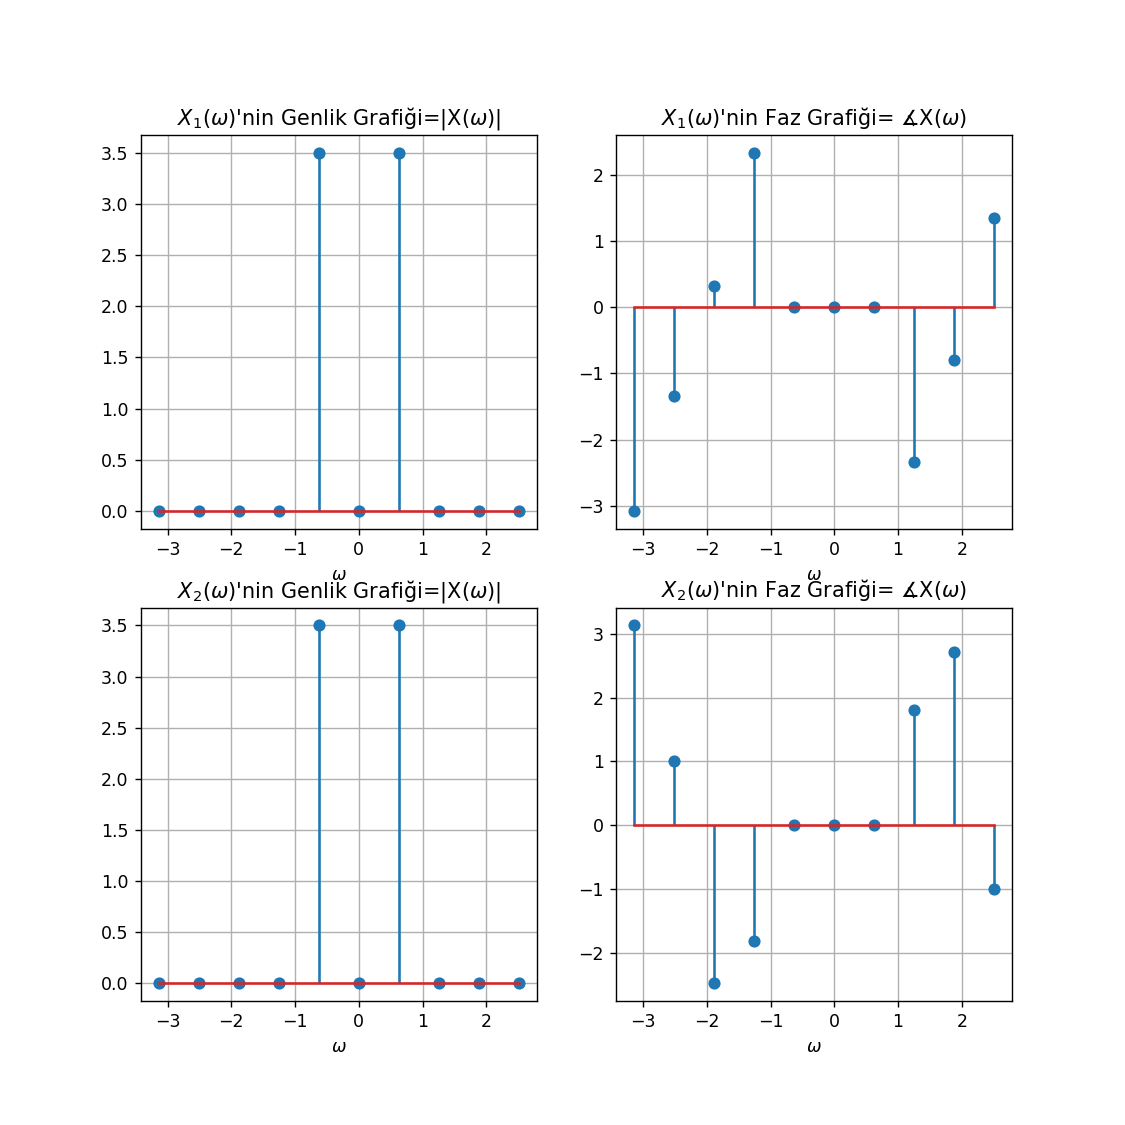

In [8]:
#işaretimizin fourier dönüşümünü alalım
#iki sinyalimiz için de N=10 bulmuştuk.

N=10

w=np.linspace(-pi,pi-(2*pi/N),N) #aralıkların belirlenmesi

xw_2_1=np.fft.fft(x_2_1,N)/N  #fourier dönüşümünün alınması
xw_2_1=np.fft.fftshift(xw_2_1) #ffshift ile X(w) nin -pi ve pi aralığında gösterilmesi

xw_2_2=np.fft.fft(x_2_2,N)/N  #fourier dönüşümünün alınması
xw_2_2=np.fft.fftshift(xw_2_2) #ffshift ile X(w) nin -pi ve pi aralığında gösterilmesi

plt.figure(figsize=[9,9])  #grafiklerin boyutunun ayarlanması
plt.subplot(221)
plt.stem(w,np.abs(xw_2_1),use_line_collection=True)  #abs() komutu ile genliğinin bulunması ve çizdirilmesi
plt.title("$X_1$($\omega$)'nin Genlik Grafiği=|X($\omega$)|")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(222)
plt.stem(w,np.angle(xw_2_1),use_line_collection=True) #angle() komutu ile fazının bulunması e çizdirilmesi
plt.title("$X_1$($\omega$)'nin Faz Grafiği= $ \measuredangle$X($\omega$)")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(223)
plt.stem(w,np.abs(xw_2_2),use_line_collection=True)  #abs() komutu ile genliğinin bulunması ve çizdirilmesi
plt.title("$X_2$($\omega$)'nin Genlik Grafiği=|X($\omega$)|")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(224)
plt.stem(w,np.angle(xw_2_2),use_line_collection=True) #angle() komutu ile fazının bulunması e çizdirilmesi
plt.title("$X_2$($\omega$)'nin Faz Grafiği= $ \measuredangle$X($\omega$)")
plt.xlabel("$\omega$")
plt.grid()

plt.show()

#### 2. c) Elde ettiğiniz 𝑋1(𝜔) ve 𝑋2(𝜔)’nın genlik ve faz grafiklerinden 𝑥1[𝑛] ve 𝑥2[𝑛] işaretlerinin ne olduğunu tahmin ediniz. Bu ayrık zamanlı işaretler beklediğiniz gibi mi? Neden?

Elde ettiğimiz grafiklere bakacak olursak, işaretlerimiz ilk soru ile aynı olmasına rağmen beklenenden biraz farklı grafikler görmekteyiz. Grafikleri gözlemleyerek yorumlayacak olursak, bu giriş sinyalleri aynı (ters fazlarda) ve tek bir kosinüs dalgası derdik ancak biliyoruz ki girişteki işaretlerimiz daha farklı...
Aslında seçilen Fs'yi göz önüne alırsak bu beklediğimiz bir durumdu. Yukarıda da belirttiğim gibi bunun sebebi örtüşme olmasıdır; İlk giriş sinyalimiz nyquist şartını sağlıyor ve örtüşme olmadan grafikleri görüntüleyebiliyoruz. Ancak ikinci giriş sinyalimiz için Fs > 2 * Fn şartı sağlanmadığı için örtüşme yaşanmaktadır ve CTFT aldığımızda örtüşmeden dolayı beklediğimiz çıkışı alamamaktayız. Bu durumu gidermek için, İkinci girişimiz için nyquist denklemi yazarsak; Fs > 2 * 900 olur. 

Dolayısıyla örtüşmeyi engellemek için ikinci girişi en az Fs = 1800 Hz ile örneklememiz gerekliydi.

## SORU 3)

#### 𝑥3(𝑡)=𝑠𝑖𝑛⁡(9600𝜋𝑡) işaretini 𝐹𝑠=8192⁡𝐻𝑧 ile örnekleyerek 𝑥3[𝑛] işaretini elde edilmektedir.


𝑥_3(𝑡)=sin(9600𝜋𝑡) için örnekleme yapacak olursak;
işaretin temel frekansı 9600/2 = 4800'dir.
8192 > 2 * 4800 olur ve nyquist şartını sağlamaz, örtüşme olacaktır.

x_3(t) = x_3[n] | t <- nT deriz,
x_3[n] = sin(9600𝜋n/8192) olur
x_3[n] = sin(75𝜋n/64) olur.

Burada 75𝜋/64 = 2𝜋k/N deriz ve k = 75 için N=128 olur.

##### a. 𝑥3(𝑡) işaretini tam 3 periyot için çizdiriniz.

<IPython.core.display.Javascript object>


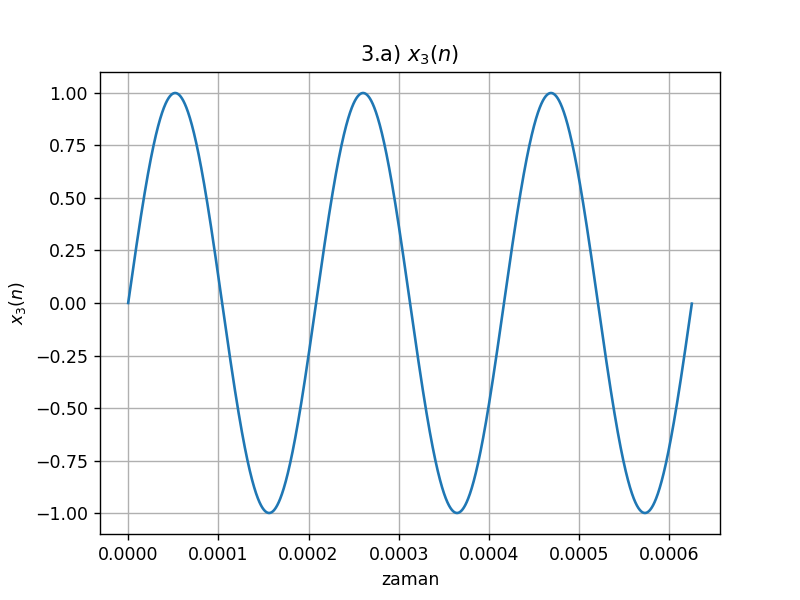

In [9]:
Fn = 4800
T=1/Fn # örnek sayısının tanımlanması (x_1 için)
t=np.arange(0.,3*T,0.0000001) # örnekleme indisinin 0'dan üç periyot olacak şekilde array olarak tanımlanması
x_3t=sin(2*4800*pi*t) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(301); #çizimler için yeni figür açılması
plt.plot(t,x_3t) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("3.a) $x_3(n)$") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("zaman") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_3(n)$") # grafiğin y ekseninin isimlendirilmesi
plt.grid()
plt.show() # grafiğin gösterilmes

#####  b. 𝑥3[𝑛] işaretini tam 3 periyot için çizdiriniz.

<IPython.core.display.Javascript object>


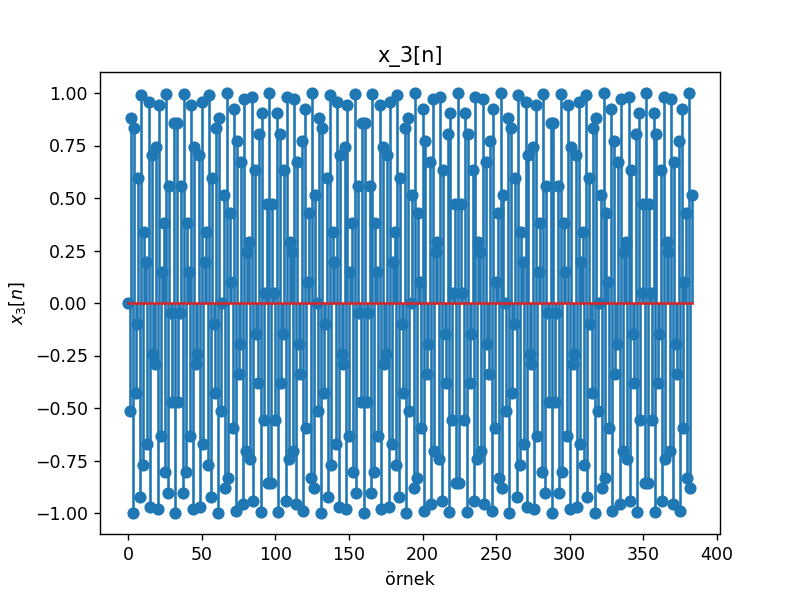

In [10]:
Fs_3=8192 # örnekleme frekansının tanımlanması
Ts_3=1/Fs_3 # örnekleme periyodunun tanımlanması 

#k=75 için N=128 bulmuştuk.

N_3=128 # örnek sayısının tanımlanması (x_1 için)
n_3=np.arange(0.,3*N_3) # örnekleme indisinin 0'dan üç periyot olacak şekilde array olarak tanımlanması
x_3n=sin(9600*pi*n_3*Ts_3) #örneklenmiş x[n] işaretinin tanımlanması
plt.figure(302); #çizimler için yeni figür açılması
plt.stem(n_3,x_3n) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("x_3[n]") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_3[n]$") # grafiğin y ekseninin isimlendirilmesi
plt.show() # grafiğin gösterilmesi

#####  c. 𝑥3[𝑛] işaretinin fft() fonksiyonunu kullanarak Fourier dönüşümünü elde ediniz ve genlik ve faz grafiklerini çizdiriniz.

<IPython.core.display.Javascript object>


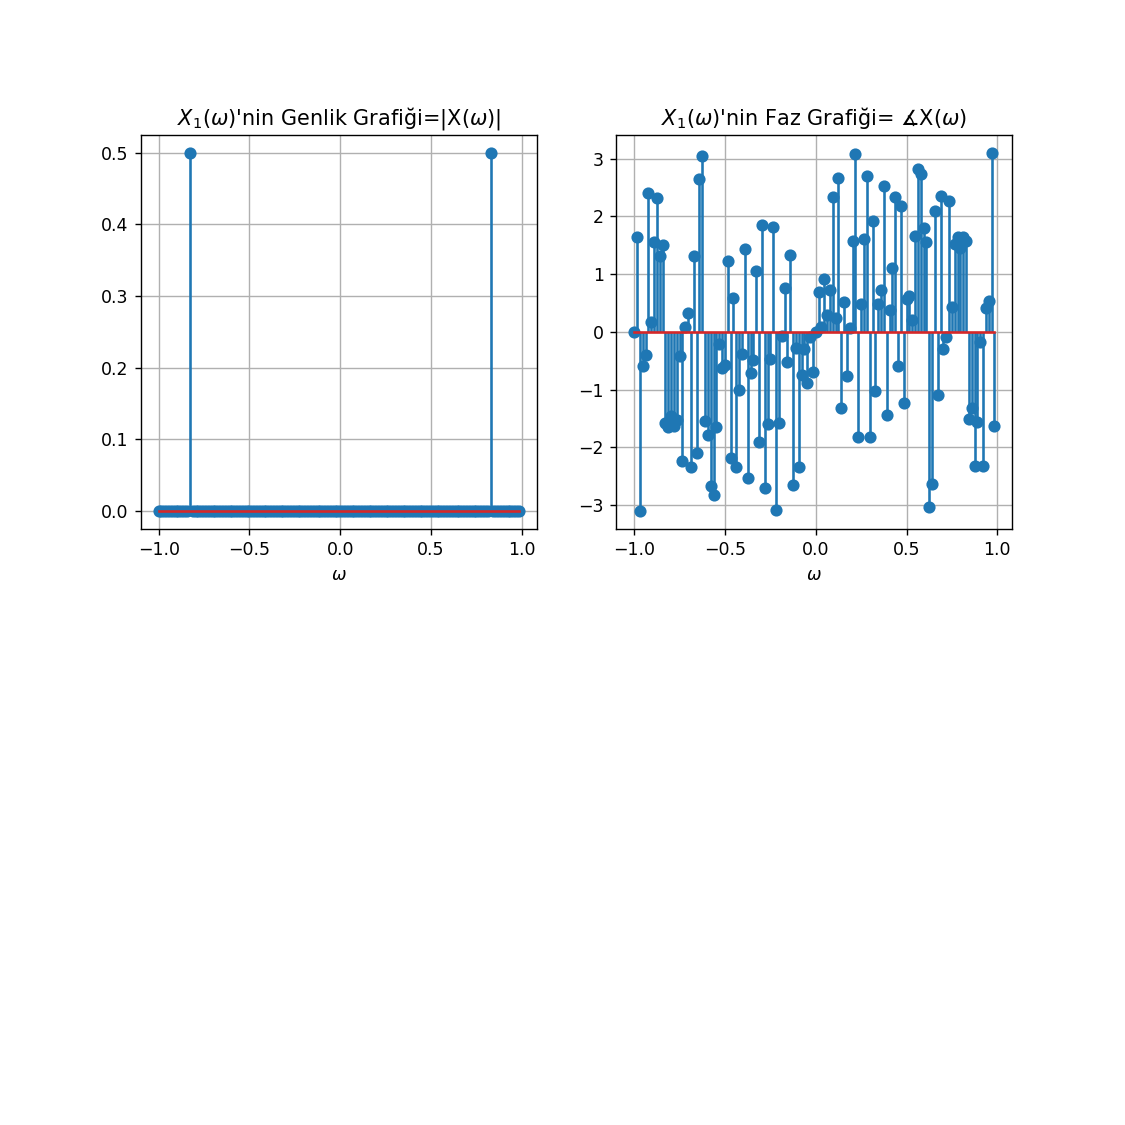

In [11]:
N=128

w=np.linspace(-pi,pi-(2*pi/N),N) #aralıkların belirlenmesi

xw_3=np.fft.fft(x_3n,N)/N  #fourier dönüşümünün alınması
xw_3=np.fft.fftshift(xw_3) #ffshift ile X(w) nin -pi ve pi aralığında gösterilmesi


plt.figure(figsize=[9,9])  #grafiklerin boyutunun ayarlanması
plt.subplot(221)
plt.stem(w/pi,np.abs(xw_3),use_line_collection=True)  #abs() komutu ile genliğinin bulunması ve çizdirilmesi
plt.title("$X_1$($\omega$)'nin Genlik Grafiği=|X($\omega$)|")
plt.xlabel("$\omega$")
plt.grid()

plt.subplot(222)
plt.stem(w/pi,np.angle(xw_3),use_line_collection=True) #angle() komutu ile fazının bulunması e çizdirilmesi
plt.title("$X_1$($\omega$)'nin Faz Grafiği= $ \measuredangle$X($\omega$)")
plt.xlabel("$\omega$")
plt.grid()

#####  d. (c) şıkkında elde ettiğiniz grafikten yararlanarak bu grafiğin hangi fonksiyona ait olduğunu bulunuz (Not: 𝑥4[𝑛]=𝐴𝑠𝑖𝑛(𝐵𝜋𝑛) formundaki işaret için 𝐴 ve 𝐵 parametrelerini bulacaksınız).

Genlik grafiğinde bulduğumuz ve bunlara karşılık gelen fazları düşünürsek sinyalimiz;
X(w) = 0.5e^(-j1.5𝜋) * 𝛿(w - 0.828) + 0.5e^(j1.5𝜋) * 𝛿(w - 0.828) olarak bulunur. Bu sinyali ters fourier dönüşümüne tabi tutarsak da $x_4[n]$ işaretimizi;
$x_4[n] = -sin(0.828𝜋n)$ olarak buluruz. burada A ve B parametreleri olarak ifade edevek olursak;
A = -1,
B = 0.828 olur.

#####  e. 𝑥3[𝑛] ile 𝑥4[𝑛]’i aynı grafik üzerinde çizdirip sonucu yorumlayınız.

<IPython.core.display.Javascript object>


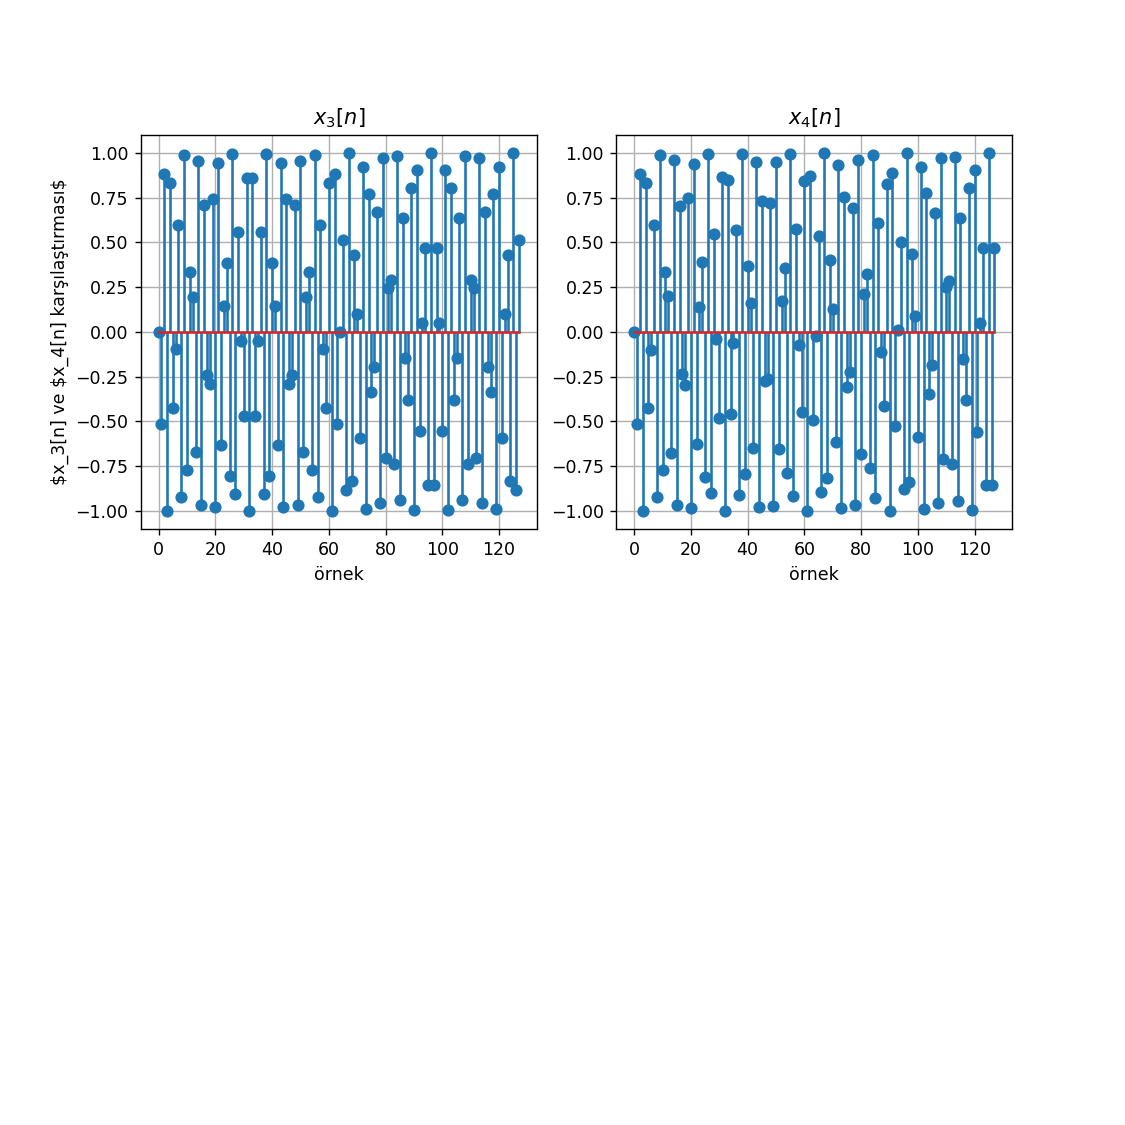

In [13]:
Fs_3=8192 # örnekleme frekansının tanımlanması
Ts_3=1/Fs_3 # örnekleme periyodunun tanımlanması 

#k=75 için N=128 bulmuştuk.

N_3=128 # örnek sayısının tanımlanması (x_1 için)
n_3=np.arange(0.,N_3) # örnekleme indisinin 0'dan 1 periyot olacak şekilde array olarak tanımlanması
x_3n=sin(9600*pi*n_3*Ts_3) #örneklenmiş x[n] işaretinin tanımlanması
x_4n=-sin(0.828*pi*n_3)    #elde ettiğimiz yeni işaretin tanımlanması

plt.figure(figsize=[9,9])  #grafiklerin boyutunun ayarlanması

plt.subplot(221)
plt.stem(n_3,x_3n) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("$x_3[n]$") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$x_3[n] ve $x_4[n] karşılaştırması$") # grafiğin y ekseninin isimlendirilmesi
plt.grid()

plt.subplot(222)
plt.stem(n_3,x_4n) # x[n] işaretinin grafiğinin çizdirilmesi
plt.title("$x_4[n]$") # x[n] işaretinin grafiğinin isimlendirilmesi
plt.xlabel("örnek") # grafiğin x ekseninin isimlendirilmesi
plt.grid()


plt.show() # grafiğin gösterilmesi

Yorum: Grafiklere bakacak olursak, $x_3[n]$ ve $x_4[n]$ işaretleri aynı olarak bulunmuştur. Bu işaretlerin aynı olması çok mantıklı değildir çünkü işaretlerimiz farklıdır. Grafiksel olarak farklı işaretlerin aynı sonuç vermesinin sebebi örtüşme olmasıdır. Yukarıda sorunun başında da belirttiğim gibi $x_3(t)$ işaretimizi Fs = 8192 ile örneklediğimizde örtüşme olmuştur. Örtüşme olduğu durumda geri elde ettiğimiz sinyalin ilk sinyalden farklı olması doğaldır.
    

## SORU 4)

#### 𝑥[𝑛]=[1.25⁡,3.5⁡,4⁡,6.7⁡,−1.4⁡,−3.5⁡,−10.5⁡,8.5⁡,3.8] olarak verilmektedir. 𝑥[𝑛] işareti 3 bit ile ifade edilmek isteniyorsa, mid-rise ve mid-tread yöntemleri ile işareti kuantalayarak çizdiriniz.

<IPython.core.display.Javascript object>


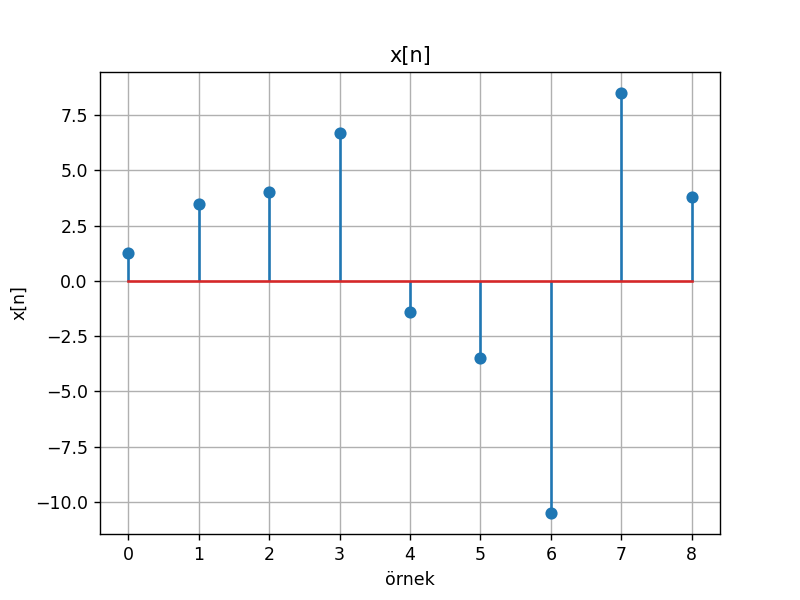

In [24]:
n=np.array([0,1,2,3,4,5,6,7,8])  #x[n] işaretimiz 9 örnekten oluştuğu için aralığımızı 9-1= 8 yani 0dan 8 e kadar seçiyoruz.
xn=np.array([1.25,3.5,4,6.7,-1.4,-3.5,-10.5,8.5,3.8]) 
plt.figure(401)
plt.xlabel('örnek')
plt.ylabel('x[n]')
plt.title ('x[n]')
plt.stem(n,xn,use_line_collection=True)
plt.grid()
plt.show()

Array şeklinde verilmiş işaretimizi çizdirdik.

In [21]:
#kuantalama fonksiyonunu yazalım.
def quantize(x,S):
    X=x.reshape((-1,1))
    S=S.reshape((1,-1))
    dists=abs(X-S)
    
    nearestIndex = dists.argmin(axis=1)
    quantized=S.flat[nearestIndex]
    
    return quantized.reshape(x.shape)

Range: 19.0
delta değerimiz: 2.375


<IPython.core.display.Javascript object>


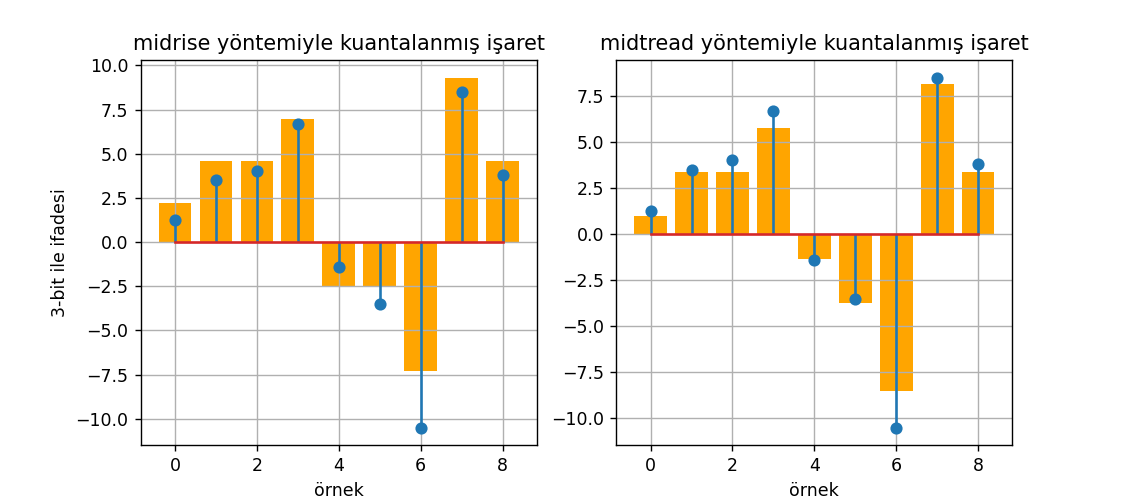

In [26]:
Max_range=np.amax(xn)-np.amin(xn)   # max_range miz = 8.5-(-10.5)=19 olmalı
print('Range:',Max_range)

k=3    #bit sayısı
q=pow(2,k)
delta=Max_range/q  #adım aralığı (delta değerimizin bulunması) (19/(2^3) = 2.375 bulunması lazım)
print('delta değerimiz:', delta)

S_midrise=-np.amax(xn)+delta/2+np.arange(q)*delta  #midrise için formülümüz
S_midtread=-np.amax(xn)+np.arange(q)*delta         #midtread yöntemi için formülümüz

y_midtrise=quantize(xn,S_midrise)            #quantize(x,S) foksiyonunun çağrılması ile kuantalanmış işaretin elde edilmesi
y_midtread=quantize(xn,S_midtread)

plt.figure(411,figsize=[9,4])

#midrise yöntemiyle kuantalanmış işaretin çizdirilmesi
plt.subplot(121)
plt.stem(n,xn)
plt.bar(n,y_midtrise,color='orange')
plt.xlabel("örnek")
plt.ylabel("3-bit ile ifadesi")
plt.title('midrise yöntemiyle kuantalanmış işaret')
plt.grid()

#midtread yöntemiyle kuantalanmış işaretin çizdirilmesi
plt.subplot(122)
plt.stem(n,xn)
plt.bar(n,y_midtread,color='orange')
plt.xlabel("örnek")
plt.title('midtread yöntemiyle kuantalanmış işaret')
plt.grid()
plt.show()

### Ödev Sonu